# <center>UrbanSound8K - Classes Acoustics Signature</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries-Import" data-toc-modified-id="Libraries-Import-1">Libraries Import</a></span></li><li><span><a href="#Import-of-the-Metadata-File" data-toc-modified-id="Import-of-the-Metadata-File-2">Import of the Metadata File</a></span></li><li><span><a href="#Torchaudio-Transforms" data-toc-modified-id="Torchaudio-Transforms-3">Torchaudio Transforms</a></span><ul class="toc-item"><li><span><a href="#Spectrogram" data-toc-modified-id="Spectrogram-3.1">Spectrogram</a></span></li><li><span><a href="#Mel-Spectrogram" data-toc-modified-id="Mel-Spectrogram-3.2">Mel-Spectrogram</a></span></li><li><span><a href="#MFCC" data-toc-modified-id="MFCC-3.3">MFCC</a></span></li><li><span><a href="#Amplitude-to-dB" data-toc-modified-id="Amplitude-to-dB-3.4">Amplitude to dB</a></span></li></ul></li><li><span><a href="#Audio-Processing-Parameters" data-toc-modified-id="Audio-Processing-Parameters-4">Audio Processing Parameters</a></span></li><li><span><a href="#Comparison-of-Multiple-Audios-From-the-Same-Class" data-toc-modified-id="Comparison-of-Multiple-Audios-From-the-Same-Class-5">Comparison of Multiple Audios From the Same Class</a></span><ul class="toc-item"><li><span><a href="#Selection-of-Audios" data-toc-modified-id="Selection-of-Audios-5.1">Selection of Audios</a></span></li><li><span><a href="#Temporal-Representation" data-toc-modified-id="Temporal-Representation-5.2">Temporal Representation</a></span></li><li><span><a href="#Spectrogram" data-toc-modified-id="Spectrogram-5.3">Spectrogram</a></span></li><li><span><a href="#Mel-Spectrogram" data-toc-modified-id="Mel-Spectrogram-5.4">Mel-Spectrogram</a></span></li><li><span><a href="#MFCCs" data-toc-modified-id="MFCCs-5.5">MFCCs</a></span></li></ul></li><li><span><a href="#Comparison-of-Classes" data-toc-modified-id="Comparison-of-Classes-6">Comparison of Classes</a></span><ul class="toc-item"><li><span><a href="#Selection-Of-One-Audio-Per-Class" data-toc-modified-id="Selection-Of-One-Audio-Per-Class-6.1">Selection Of One Audio Per Class</a></span></li><li><span><a href="#Comparison-Of-Features" data-toc-modified-id="Comparison-Of-Features-6.2">Comparison Of Features</a></span></li></ul></li></ul></div>

## Libraries Import

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import IPython
import datetime
import torch
import torch.nn as nn
import torchaudio
import torchaudio.transforms as transforms

## Paths

In [3]:
dataset_path = "../dataset"
figures_path = "../figures"

## Import of the Metadata File

In [4]:
metadata = pd.read_csv(os.path.join(dataset_path,"UrbanSound8K.csv"))
metadata

slice_file_name    fsID       start         end  salience  fold  \
0       100032-3-0-0.wav  100032    0.000000    0.317551         1     5   
1     100263-2-0-117.wav  100263   58.500000   62.500000         1     5   
2     100263-2-0-121.wav  100263   60.500000   64.500000         1     5   
3     100263-2-0-126.wav  100263   63.000000   67.000000         1     5   
4     100263-2-0-137.wav  100263   68.500000   72.500000         1     5   
...                  ...     ...         ...         ...       ...   ...   
8727     99812-1-2-0.wav   99812  159.522205  163.522205         2     7   
8728     99812-1-3-0.wav   99812  181.142431  183.284976         2     7   
8729     99812-1-4-0.wav   99812  242.691902  246.197885         2     7   
8730     99812-1-5-0.wav   99812  253.209850  255.741948         2     7   
8731     99812-1-6-0.wav   99812  332.289233  334.821332         2     7   

      classID             class  
0           3          dog_bark  
1           2  children_playing  
2           2  children_playing  
3           2  children_playing  
4           2  children_playing  
...       ...               ...  
8727        1          car_horn  
8728        1          car_horn  
8729        1          car_horn  
8730        1          car_horn  
8731        1          car_horn  

[8732 rows x 8 columns]

## Torchaudio Transforms

### Spectrogram

In [11]:
spectrogram_transform = torchaudio.transforms.Spectrogram( 
                    # Size of FFT, creates n_fft // 2 + 1 bins. (Default: 400)
                    n_fft = 256,
                    # Window size. (Default: n_fft)
                    win_length = 256,
                    # Length of hop between STFT windows. (Default: win_length // 2)
                    hop_length = 128,
                    # Two sided padding of signal. (Default: 0)
                    pad = 0,
                    # A function to create a window tensor that is applied/multiplied to each frame/window. (Default: torch.hann_window)
                    window_fn = torch.hann_window,
                    # Exponent for the magnitude spectrogram, (must be > 0) e.g., 1 for energy, 2 for power, etc. (Default: 2)
                    power = 2,
                    # Whether to normalize by magnitude after stft. (Default: False)
                    normalized = True,
                    # Arguments for window function. (Default: None)
                    wkwargs = None,
                    # Whether to pad waveform on both sides so that the t-th frame is centered at time t x hop_length (Default: True)
                    center = False,
                    # Controls the padding method used when center is True. (Default: "reflect")
                    pad_mode = "reflect",
                    # Controls whether to return half of results to avoid redundancy. (Default: True)
                    onesided = True
                    )   

### Mel-Spectrogram

In [12]:
mel_spectrogram_transform = torchaudio.transforms.MelSpectrogram(
                    # Sample rate of audio signal. (Default: 16000)
                    sample_rate = 22050,
                    # Size of FFT, creates n_fft // 2 + 1 bins. (Default: 400)
                    n_fft = 400,
                    # Window size. (Default: n_fft)
                    win_length = 400,
                    # Length of hop between STFT windows. (Default: win_length // 2)
                    hop_length = 200,
                    # Minimum frequency. (Default: 0.)
                    f_min = 0.,
                    # Maximum frequency. (Default: None)
                    f_max = None,
                    # Two sided padding of signal. (Default: 0)    
                    pad = 0,
                    # Number of mel filterbanks. (Default: 128)
                    n_mels = 64,
                    # A function to create a window tensor that is applied/multiplied to each frame/window. (Default: torch.hann_window)
                    window_fn = torch.hann_window,
                    # Exponent for the magnitude spectrogram, (must be > 0) e.g., 1 for energy, 2 for power, etc. (Default: 2)
                    power = 2,
                    # Whether to normalize by magnitude after stft. (Default: False)
                    normalized = True,
                    # Arguments for window function. (Default: None)
                    wkwargs = None, 
                    # Whether to pad waveform on both sides so that the t-th frame is centered at time t x hop_length (Default: True)
                    center = True, 
                    # Controls the padding method used when center is True. (Default: "reflect")
                    pad_mode = "reflect", 
                    # Controls whether to return half of results to avoid redundancy. (Default: True)
                    onesided = True, 
                    # If 'slaney', divide the triangular mel weights by the width of the mel band (area normalization). (Default: None)
                    norm = None,
                    # Scale to use: htk or slaney. (Default: "htk")
                    mel_scale = "htk"
                    )

### MFCC

In [13]:
mfcc_transform = torchaudio.transforms.MFCC(
                    # Sample rate of audio signal. (Default: 16000)
                    sample_rate = 22050,
                    # Number of mfc coefficients to retain. (Default: 40)
                    n_mfcc = 40,
                    # Type of DCT (discrete cosine transform) to use. (Default: 2)
                    dct_type = 2,
                    # Norm to use. (Default: "ortho")
                    norm = "ortho", 
                    # Whether to use log-mel spectrograms instead of db-scaled. (Default: False)
                    log_mels = True,
                    # Arguments for MelSpectrogram (Default: None)
                    melkwargs = None
                    )

### Amplitude to dB

In [14]:
amplitude_to_db_transform = torchaudio.transforms.AmplitudeToDB(
                    # Scale of input tensor ("power" or "magnitude"). The power being the elementwise square of the magnitude. (Default: "power")
                    stype = "power",
                    # Minimum negative cut-off in decibels. A reasonable number is 80. (Default: None)
                    top_db = None
                    )

## Audio Processing Parameters

In [15]:
target_length = 4
target_sample_rate = 22050
n_samples = target_length * target_sample_rate

## Comparison of Multiple Audio From the Same Class

For a recall, the different classes present in the UrbanSound8K dataset are:
- air_conditioner
- car_horn
- children_playing
- dog_bark
- drilling
- engine_idling
- gun_shot
- jackhammer
- siren
- street_music

### Selection of Audio

In [26]:
events_class = "dog_bark"
events_salience = 1

events = metadata[
    (metadata["class"] == class_name) & 
    (metadata["salience"] == salience)
].sample(10)

display(events)

slice_file_name    fsID       start         end  salience  fold  \
8213    82811-3-0-1.wav   82811    1.718396    5.718396         1     3   
600    109711-3-2-4.wav  109711   14.001624   18.001624         1     4   
5180  201207-3-29-0.wav  201207  140.774118  144.774118         1     4   
4830   191382-3-1-1.wav  191382   29.136596   33.136596         1     5   
3562  173993-3-0-25.wav  173993   12.500000   16.500000         1     5   
3507   171464-3-0-0.wav  171464    0.719177    2.434138         1     8   
867    117271-3-0-3.wav  117271    1.500000    5.500000         1     6   
5484   207124-3-2-0.wav  207124    6.846030   10.846030         1     3   
841   117048-3-0-17.wav  117048    8.500000   12.500000         1     3   
6124    33849-3-0-0.wav   33849    0.000000    0.264593         1     2   

      classID     class  
8213        3  dog_bark  
600         3  dog_bark  
5180        3  dog_bark  
4830        3  dog_bark  
3562        3  dog_bark  
3507        3  dog_bark  
867         3  dog_bark  
5484        3  dog_bark  
841         3  dog_bark  
6124        3  dog_bark

In [20]:
# Creation of a dictionnary to store each of the selected audio paths and their corresponding pre-processed temporal signal
signals = {}

for index, row in events.iterrows():
    audio_filename = row["slice_file_name"]
    audio_fold = f"fold{row['fold']}"
    audio_path = os.path.join(dataset_path, audio_fold, audio_filename)
    # Load the audio signal
    signal, sr = torchaudio.load(audio_path)
    # Mix it down to mono if necessary
    if signal.shape[0] > 1:
        signal = torch.mean(signal, dim=0, keepdim=True)
    # Resample it
    resample_transform = transforms.Resample(sr, target_sample_rate)
    signal = resample_transform(signal)
    # Cut if necessary
    if signal.shape[1] > n_samples:
        signal = signal[:, :n_samples]
    # Right pad if necessary
    if signal.shape[1] < n_samples:
        n_missing_samples = n_samples - signal.shape[1]
        last_dim_padding = (0, n_missing_samples)
        signal = nn.functional.pad(signal, last_dim_padding)
    signals[audio_path] = signal

### Temporal Representation

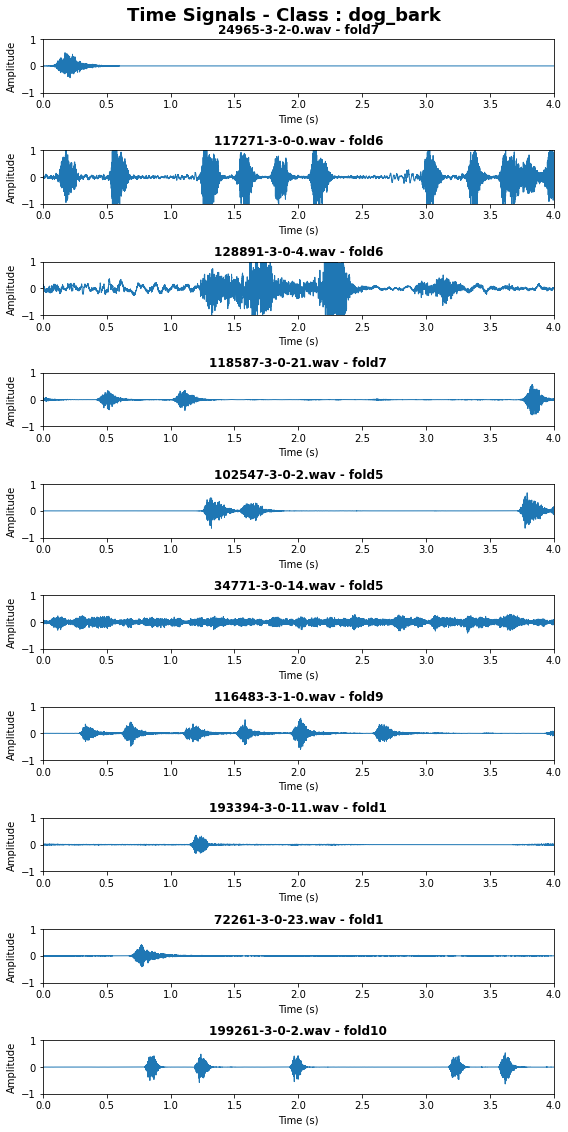

In [32]:
fig, axs = plt.subplots(nrows=len(signals), ncols=1, figsize=(8, 16))

for i, (audio_path, signal) in enumerate(signals.items()):
    
    audio_path_splits = audio_path.split("\\")
    fold = audio_path_splits[1]
    audio_name = audio_path_splits[2]
                                         
    num_channels, num_frames = signal.shape
    time_axis = torch.arange(0, num_frames) / target_sample_rate
    
    axs[i].plot(time_axis, signal[0], linewidth=1)
    axs[i].set_title(f"{audio_name} - {fold}", fontweight="bold")
    axs[i].set_ylabel("Amplitude")
    axs[i].set_xlabel("Time (s)")
    axs[i].set_xlim([0, 4])    
    axs[i].set_ylim([-1, 1])
    
fig.suptitle(f"Time Signals - Classe : {events_class}", fontsize=18, fontweight="bold")
plt.tight_layout()
figure_name = f"Signature Acoustique des Classes - Signaux Temporels - {events_class}.png"
plt.savefig(os.path.join(figures_path, figure_name), bbox_inches="tight")
plt.show()

### Spectrogram

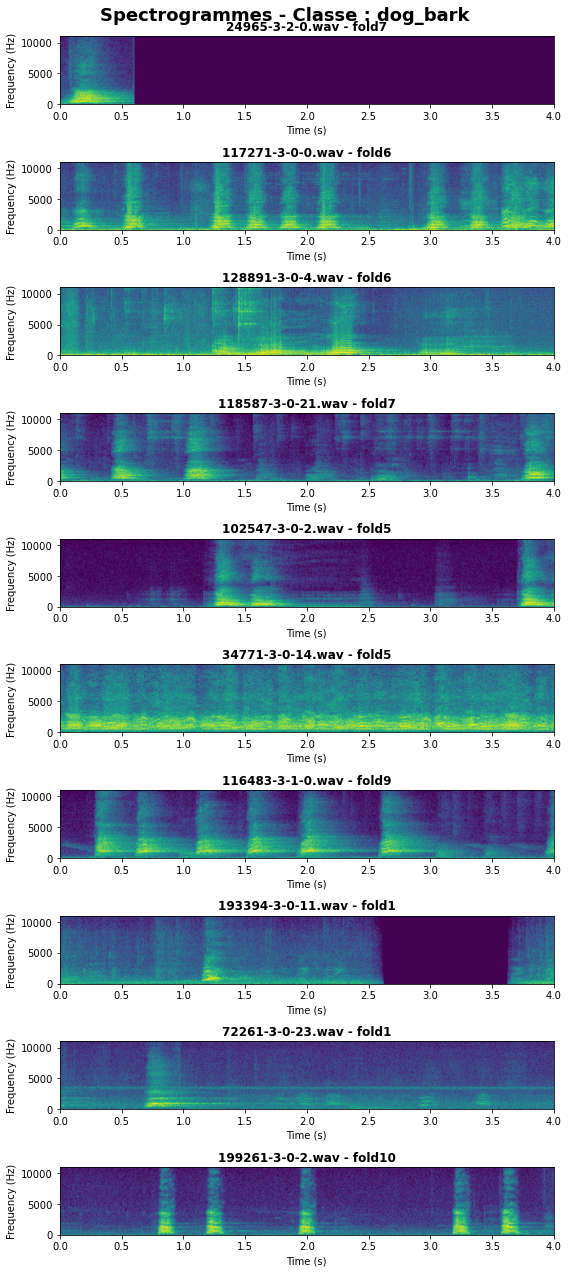

In [36]:
fig, axs = plt.subplots(nrows=len(signals), ncols=1, figsize=(8, 18))

for i, (audio_path, signal) in enumerate(signals.items()):
    
    audio_path_splits = audio_path.split("\\")
    fold = audio_path_splits[1]
    audio_name = audio_path_splits[2]
    
    num_channels, num_frames = signal.shape
    time_axis = torch.arange(0, num_frames) / target_sample_rate

    spectrogram = spectrogram_transform(signal)
    spectrogram = torch.squeeze(spectrogram)
    spectrogram_db = amplitude_to_db_transform(spectrogram)
    
    n_fft_spec = (spectrogram_db.shape[0] - 1) * 2
    frequency = (target_sample_rate / n_fft_spec) * np.linspace(0, n_fft_spec/2, spectrogram_db.shape[0])
    max_frequency_bin = frequency.max()
    axs[i].imshow(spectrogram_db, extent=[0, target_length, 0, target_sample_rate/2], origin="lower", aspect="auto")
    axs[i].set_title(f"{audio_name} - {fold}", fontweight="bold")
    axs[i].set_ylabel("Frequency (Hz)")
    axs[i].set_xlabel("Time (s)")
    
fig.suptitle(f"Spectrogrammes - Classe : {events_class}", fontsize=18, fontweight="bold")
plt.tight_layout()
figure_name = f"Signature Acoustique des Classes - Spectrogrammes - {events_class}.png"
plt.savefig(os.path.join(figures_path, figure_name), bbox_inches="tight")
plt.show()

### Mel-Spectrogram

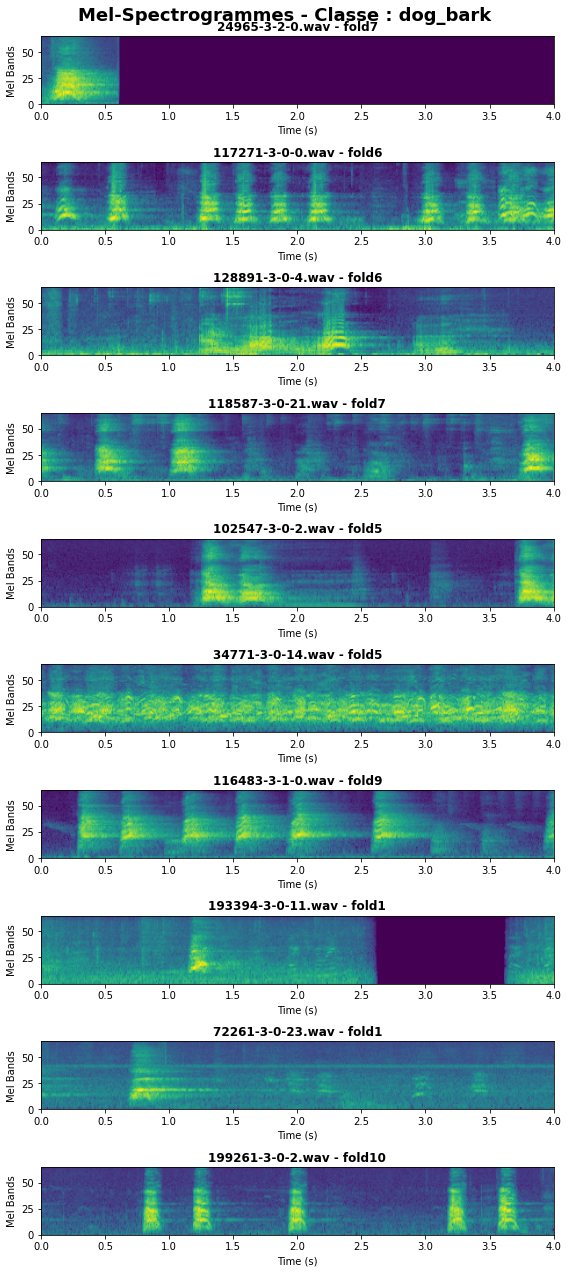

In [38]:
fig, axs = plt.subplots(nrows=len(signals), ncols=1, figsize=(8,18))

for i, (audio_path, signal) in enumerate(signals.items()):
    
    audio_path_splits = audio_path.split("\\")
    fold = audio_path_splits[1]
    audio_name = audio_path_splits[2]
    
    num_channels, num_frames = signal.shape
    time_axis = torch.arange(0, num_frames) / target_sample_rate
    
    mel_spectrogram = mel_spectrogram_transform(signal)
    mel_spectrogram = torch.squeeze(mel_spectrogram)
    mel_spectrogram_db = amplitude_to_db_transform(mel_spectrogram)
    
    axs[i].imshow(mel_spectrogram_db, extent=[0, target_length, 0, mel_spectrogram.shape[0]+1], origin="lower", aspect="auto")
    axs[i].set_title(f"{audio_name} - {fold}", fontweight="bold")
    axs[i].set_ylabel("Mel Bands")
    axs[i].set_xlabel("Time (s)")
    
fig.suptitle(f"Mel-Spectrogrammes - Classe : {events_class}", fontsize=18, fontweight="bold")
plt.tight_layout()
figure_name = f"Signature Acoustique des Classes - Mel-Spectrogrammes - {events_class}.png"
plt.savefig(os.path.join(figures_path, figure_name), bbox_inches="tight")
plt.show()

### MFCCs

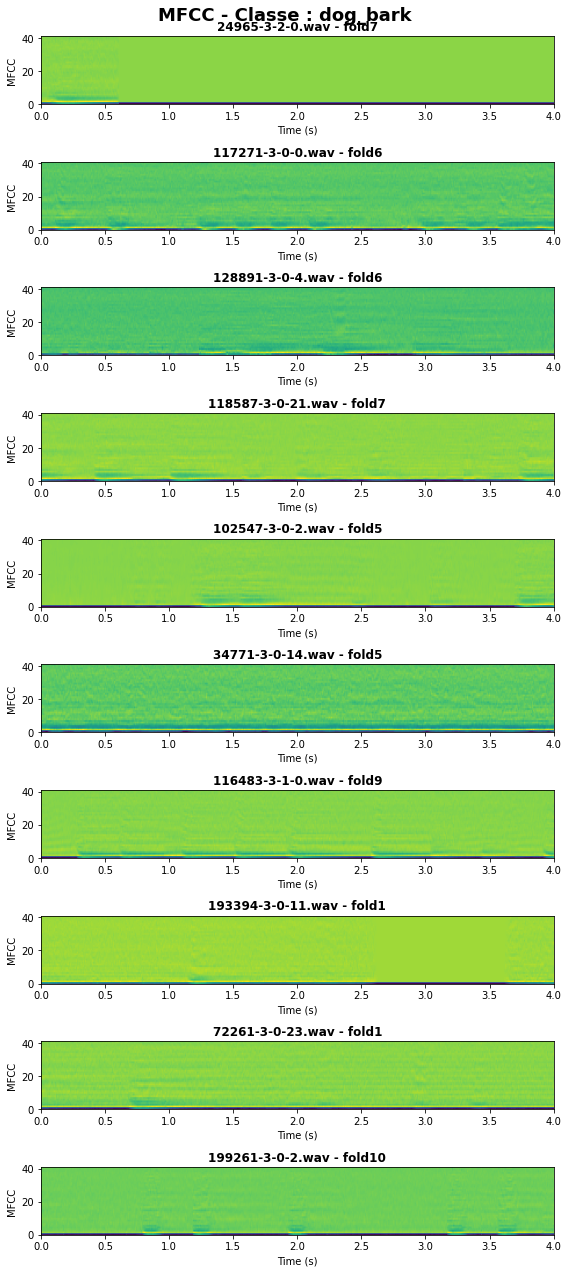

In [39]:
fig, axs = plt.subplots(nrows=len(signals), ncols=1, figsize=(8,18))

for i, (audio_path, signal) in enumerate(signals.items()):
    
    audio_path_splits = audio_path.split("\\")
    fold = audio_path_splits[1]
    audio_name = audio_path_splits[2]
    
    num_channels, num_frames = signal.shape
    time_axis = torch.arange(0, num_frames) / target_sample_rate
    
    mfcc = mfcc_transform(signal)
    mfcc = torch.squeeze(mfcc)
    
    axs[i].imshow(mfcc, extent=[0, target_length, 0, mfcc.shape[0]+1], origin="lower", aspect="auto")
    axs[i].set_title(f"{audio_name} - {fold}", fontweight="bold")
    axs[i].set_ylabel("MFCC")
    axs[i].set_xlabel("Time (s)")
    
fig.suptitle(f"MFCC - Classe : {events_class}", fontsize=18, fontweight="bold")
plt.tight_layout()
figure_name = f"Signature Acoustique des Classes - MFCC - {events_class}.png"
plt.savefig(os.path.join(figures_path, figure_name), bbox_inches="tight")
plt.show()

## Comparison of Classes

### Selection Of One Event Per Class

In [49]:
classes = metadata["class"].unique()
events = {classe: np.nan for classe in classes}

for classe in classes:
    metadata_classe = metadata[metadata["class"]==classe]
    event = metadata_classe.sample(n=1) 
    event_filename = event["slice_file_name"].item()
    event_fold = f"fold{event['fold'].item()}"
    audio_path = os.path.join(dataset_path, event_fold, event_filename)
    events[classe] = audio_path
    
display(events)

{'dog_bark': '../dataset\\fold9\\79584-3-0-8.wav',
 'children_playing': '../dataset\\fold7\\196070-2-0-5.wav',
 'car_horn': '../dataset\\fold5\\72259-1-9-12.wav',
 'air_conditioner': '../dataset\\fold10\\167464-0-0-4.wav',
 'street_music': '../dataset\\fold5\\128152-9-0-10.wav',
 'gun_shot': '../dataset\\fold1\\174290-6-1-0.wav',
 'siren': '../dataset\\fold6\\75490-8-1-1.wav',
 'engine_idling': '../dataset\\fold9\\39856-5-0-27.wav',
 'jackhammer': '../dataset\\fold8\\33340-7-10-0.wav',
 'drilling': '../dataset\\fold7\\50629-4-1-0.wav'}

### Comparison Of Features

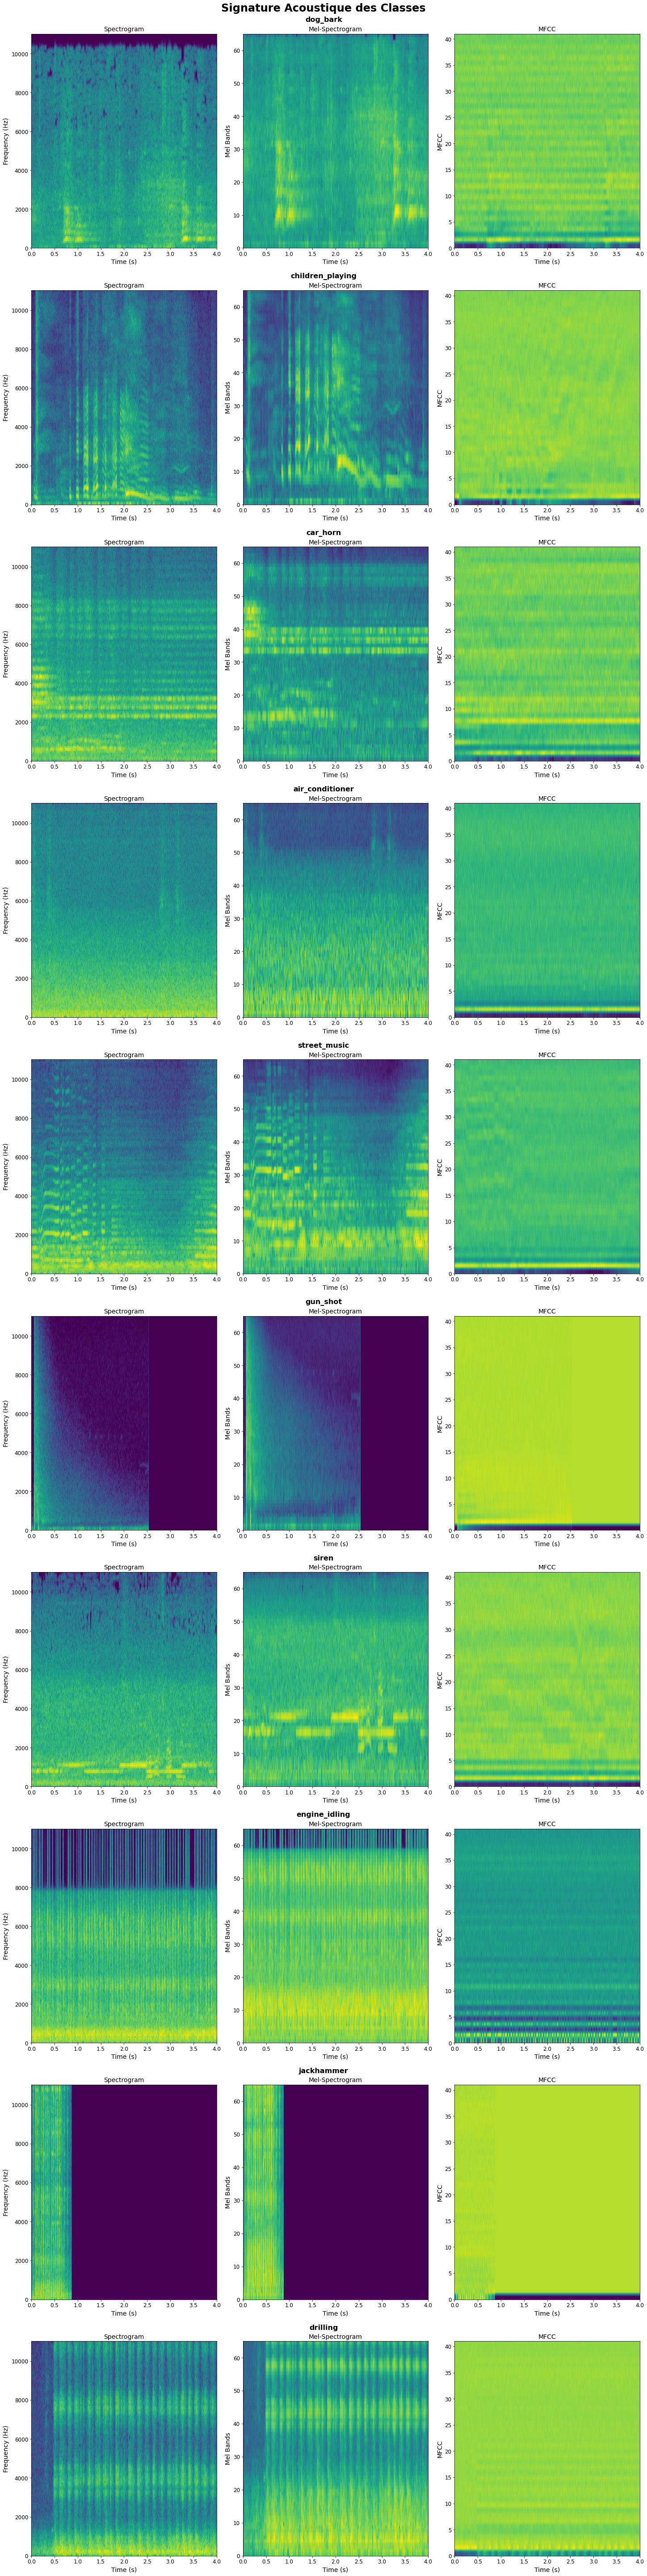

In [57]:
fig = plt.figure(figsize=(20,80), constrained_layout=True)
subfigs = fig.subfigures(len(events), 1)

for i, (classe, audio_path) in enumerate(events.items()):
    # Load the audio signal
    signal, sr = torchaudio.load(audio_path)
    # Mix it down to mono if necessary
    if signal.shape[0] > 1:
        signal = torch.mean(signal, dim=0, keepdim=True)
    # Resample it
    resample_transform = transforms.Resample(sr, target_sample_rate)
    signal = resample_transform(signal)
    # Cut if necessary
    if signal.shape[1] > n_samples:
        signal = event_signal[:, :n_samples]
    # Right pad if necessary
    if signal.shape[1] < n_samples:
        n_missing_samples = n_samples - signal.shape[1]
        last_dim_padding = (0, n_missing_samples)
        signal = nn.functional.pad(signal, last_dim_padding)
        
    ### Compute the Spectrogram
    spectrogram = spectrogram_transform(signal)
    spectrogram = torch.squeeze(spectrogram)
    spectrogram_db = amplitude_to_db_transform(spectrogram)
    
    ### Compute the Mel-Spectrogram
    mel_spectrogram = mel_spectrogram_transform(signal)
    mel_spectrogram = torch.squeeze(mel_spectrogram)
    mel_spectrogram_db = amplitude_to_db_transform(mel_spectrogram)
    
    ### Compute the MFCCs
    mfcc = mfcc_transform(signal)
    mfcc = torch.squeeze(mfcc)

    subfig = subfigs[i]
    subfig.suptitle(classe, fontsize=16, fontweight="bold")
    axes = subfig.subplots(1, 3)
    axes[0].imshow(spectrogram_db, extent=[0, target_length, 0, target_sample_rate/2], origin="lower", aspect="auto")
    axes[0].set_title("Spectrogram", fontsize=14)
    axes[0].set_xlabel("Time (s)", fontsize=14)
    axes[0].set_ylabel("Frequency (Hz)", fontsize=14)
    axes[0].tick_params(axis="both", labelsize=12)
    axes[1].imshow(mel_spectrogram_db, extent=[0, target_length, 0, mel_spectrogram_db.shape[0]+1], origin="lower", aspect="auto")
    axes[1].set_title("Mel-Spectrogram", fontsize=14)
    axes[1].set_xlabel("Time (s)", fontsize=14)
    axes[1].set_ylabel("Mel Bands", fontsize=14)
    axes[1].tick_params(axis="both", labelsize=12)
    axes[2].imshow(mfcc, extent=[0, target_length, 0, mfcc.shape[0]+1], origin="lower", aspect="auto")
    axes[2].set_title("MFCC", fontsize=14)
    axes[2].set_xlabel("Time (s)", fontsize=14)
    axes[2].set_ylabel("MFCC", fontsize=14)
    axes[2].tick_params(axis="both", labelsize=12)    

fig.suptitle(f"Signature Acoustique des Classes", fontsize=24, fontweight="bold")
figure_name = f"Signature Acoustique des Classes.png"
plt.savefig(os.path.join(figures_path, figure_name), bbox_inches="tight")
plt.show()